### 图像处理的基本操作

In [1]:
import cv2 #opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

img=cv2.imread('dog_1.jpeg')

In [9]:
img

array([[[175, 201, 177],
        [169, 198, 173],
        [165, 194, 169],
        ...,
        [229, 221, 214],
        [229, 221, 214],
        [229, 221, 214]],

       [[174, 200, 176],
        [169, 198, 173],
        [163, 193, 168],
        ...,
        [229, 221, 214],
        [229, 221, 214],
        [229, 221, 214]],

       [[172, 200, 177],
        [168, 196, 173],
        [162, 191, 168],
        ...,
        [229, 221, 214],
        [229, 221, 214],
        [229, 221, 214]],

       ...,

       [[ 89, 185, 125],
        [ 90, 184, 125],
        [ 90, 184, 125],
        ...,
        [ 92, 161,  94],
        [ 97, 166,  99],
        [101, 170, 103]],

       [[ 89, 185, 125],
        [ 89, 185, 125],
        [ 89, 185, 125],
        ...,
        [ 92, 161,  94],
        [ 97, 166,  99],
        [101, 170, 103]],

       [[ 87, 185, 125],
        [ 87, 185, 125],
        [ 87, 183, 123],
        ...,
        [ 92, 161,  94],
        [ 92, 163,  96],
        [ 92, 163,  96]]

In [10]:
#图像的显示,也可以创建多个窗口
cv2.imshow('image',img) 
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(10000) 
cv2.destroyAllWindows()

In [7]:
def cv_show(name,image):
    cv2.imshow(name,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [12]:
img.shape

(681, 1136, 3)

cv2.IMREAD_COLOR：彩色图像  
cv2.IMREAD_GRAYSCALE：灰度图像

In [2]:
image = cv2.imread('dog_2.jpeg',cv2.IMREAD_GRAYSCALE)
image

array([[ 21,  48,  61, ...,  10,  11,  13],
       [ 34,  50,  56, ...,  15,  16,  18],
       [ 47,  50,  51, ...,  17,  19,  20],
       ...,
       [169, 167, 166, ...,  87,  95,  99],
       [163, 163, 164, ..., 109, 120, 127],
       [158, 160, 163, ..., 130, 142, 151]], dtype=uint8)

In [14]:
image.shape

(646, 700)

In [3]:
cv2.imwrite('mydog.png',image)

True

In [4]:
type(image)

numpy.ndarray

In [5]:
image.size

452200

### 读取视频

In [6]:
video = cv2.VideoCapture('test_video.mp4')

In [7]:
if video.isOpened():
    open, frame = video.read()
else:
    open = False

In [9]:
while open:
    retval, frame = video.read()
    if frame is None:
        break
    if retval == True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        if cv2.waitKey(10) & 0xFF == 27:
            break
video.release()
cv2.destroyAllWindows()

### 截取部分图像数据

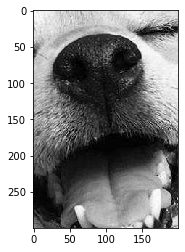

In [11]:
img = cv2.imread('mydog.png')
dog = img[200:500,300:500]
plt.imshow(dog)

In [2]:
b,g,r = cv2.split(img)


In [3]:
r

array([[177, 173, 169, ..., 214, 214, 214],
       [176, 173, 168, ..., 214, 214, 214],
       [177, 173, 168, ..., 214, 214, 214],
       ...,
       [125, 125, 125, ...,  94,  99, 103],
       [125, 125, 125, ...,  94,  99, 103],
       [125, 125, 123, ...,  94,  96,  96]], dtype=uint8)

In [4]:
r.shape

(681, 1136)

In [5]:
img = cv2.merge((b,g,r))
img.shape

(681, 1136, 3)

In [9]:
#只保留r通道
current_img = img.copy()
current_img[:,:,0] = 0
current_img[:,:,1] = 0
cv_show('r',current_img)

### 边界填充  
在卷积操作中经常需要边界填充padding，所谓的边界填充就是在图像边界填充处填充一圈像素，你可以全部填充白色的像素、或者黑色的像素、或者把边界的像素进行复制再填充过去等等。

In [3]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)

cv2.BORDER_REPLICATE表示补零的方式，这个是复制最边缘上的一个点，所有的维度都使用当前的点

In [4]:
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE)

cv2.BORDER_REFLECT:  进行翻转的补零操作，举例只对当前对应的边缘   gfedcba|abcdefgh|hgfedcb

In [5]:
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT)

cv2.BORDER_REFLECT_101： 进行翻转的补零操作， gfedcb|abcdefgh|gfedcb 

In [8]:
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT_101)

cv2.BORDER_WRAP: 进行上下边缘调换的外包复制操作     bcdegh|abcdefgh|abcdefg  
相当于进行了上下的复制

In [10]:
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_WRAP)

CONST：进行常熟的补全操作, value=0，表示使用0进行补全操作

In [13]:
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)

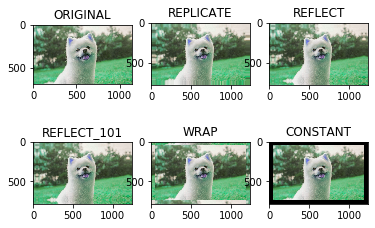

In [14]:
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

- BORDER_REPLICATE：复制法，也就是复制最边缘像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

### numerical calculation  
对像素点直接进行加减

In [15]:
img_1 = cv2.imread('dog_1.jpeg')
img_2 = cv2.imread('dog_2.jpeg')


(<matplotlib.axes._subplots.AxesSubplot at 0x123f77fd0>,
 <matplotlib.image.AxesImage at 0x1239ae400>)

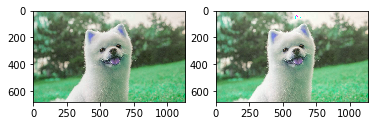

In [24]:
img_12 = img_1 + 10
plt.subplot(121),plt.imshow(img_1)
plt.subplot(122),plt.imshow(img_12)

### 图像融合


In [25]:
#首先两张图片大小要一致否则无法融合
img_1+img_2

ValueError: operands could not be broadcast together with shapes (681,1136,3) (646,700,3) 

In [26]:
img_1 = cv2.resize(img_1,(600,700))
img_1.shape

(700, 600, 3)

In [27]:
img_2 = cv2.resize(img_2,(600,700))
img_2.shape

(700, 600, 3)

(<matplotlib.axes._subplots.AxesSubplot at 0x123d53e48>,
 <matplotlib.image.AxesImage at 0x123cc93c8>)

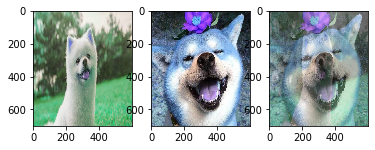

In [30]:
res = cv2.addWeighted(img_1,0.4,img_2,0.6,0)
plt.subplot(131),plt.imshow(img_1)
plt.subplot(132),plt.imshow(img_2)
plt.subplot(133),plt.imshow(res)

### 图像缩放

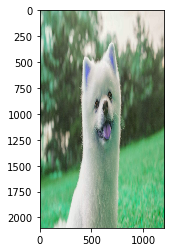

In [32]:
res = cv2.resize(img_1,(0,0),fx=2,fy=3)
plt.imshow(res)